In [0]:
import pandas as pd
import math as math
import random
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

Data Cleaning

In [0]:
data = pd.read_csv("gemini_BTCUSD_2019_10min.csv", low_memory = False)
df_test = data.copy()

In [101]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,open_ma,close_ma,high_ma,low_ma,open_ea,close_ea,high_ea,low_ea,close_so,close_stdv,label
0,1.590000e+12,3/30/2020 0:00,BTCUSD,5882.70,5886.31,5875.50,5890.41,0.013450,5882.70,5890.41,5890.41,5880.38,5882.700000,5890.410000,5890.410000,5880.380000,1.000000,0.000000,0
1,1.590000e+12,3/29/2020 23:59,BTCUSD,5882.47,5888.06,5880.38,5882.70,0.519255,5882.47,5882.70,5886.31,5875.50,5882.658182,5889.008182,5889.664545,5879.492727,1.379278,0.000000,0
2,1.590000e+12,3/29/2020 23:58,BTCUSD,5885.00,5890.41,5882.47,5882.47,3.238372,5885.00,5882.47,5888.06,5882.47,5883.083967,5887.819421,5889.372810,5880.034050,0.482897,3.855000,1
3,1.590000e+12,3/29/2020 23:57,BTCUSD,5894.20,5894.20,5885.00,5885.00,0.300839,5894.20,5885.00,5894.20,5885.00,5885.105064,5887.306799,5890.250481,5880.936950,0.467471,3.689935,1
4,1.590000e+12,3/29/2020 23:56,BTCUSD,5902.78,5902.78,5888.88,5894.20,3.802124,5902.78,5894.20,5902.78,5888.88,5888.318689,5888.560109,5892.528575,5882.381141,0.508021,3.196674,1


In [102]:
data.shape

(604792, 19)

In [0]:
train = data.iloc[20000:120000].copy()
test = data.iloc[0:20000].copy()
# train = data.iloc[5000:30000].copy()
# test = data.iloc[0:5000].copy()

In [104]:
print(len(train), len(test))

100000 20000


In [105]:
train.head

<bound method NDFrame.head of         Unix Timestamp            Date  Symbol  ...  close_so  close_stdv  label
20000     1.580000e+12  3/15/2020 2:41  BTCUSD  ...  0.002753    6.541641      0
20001     1.580000e+12  3/15/2020 2:40  BTCUSD  ...  0.000167    3.800581      1
20002     1.580000e+12  3/15/2020 2:39  BTCUSD  ...  0.000000    3.707290      1
20003     1.580000e+12  3/15/2020 2:38  BTCUSD  ...  0.000000    6.453562      0
20004     1.580000e+12  3/15/2020 2:37  BTCUSD  ...  0.002329    9.802453      1
...                ...             ...     ...  ...       ...         ...    ...
119995    1.580000e+12  1/1/2020 16:10  BTCUSD  ...  0.000000    4.243275      0
119996    1.580000e+12  1/1/2020 16:09  BTCUSD  ...  0.000142    3.213029      1
119997    1.580000e+12  1/1/2020 16:08  BTCUSD  ...  0.000000    0.924851      1
119998    1.580000e+12  1/1/2020 16:07  BTCUSD  ...  0.000000    0.905099      1
119999    1.580000e+12  1/1/2020 16:06  BTCUSD  ...  0.000000    0.907849      

In [106]:
test.head

<bound method NDFrame.head of        Unix Timestamp             Date  Symbol  ...  close_so  close_stdv  label
0        1.590000e+12   3/30/2020 0:00  BTCUSD  ...  1.000000    0.000000      0
1        1.590000e+12  3/29/2020 23:59  BTCUSD  ...  1.379278    0.000000      0
2        1.590000e+12  3/29/2020 23:58  BTCUSD  ...  0.482897    3.855000      1
3        1.590000e+12  3/29/2020 23:57  BTCUSD  ...  0.467471    3.689935      1
4        1.590000e+12  3/29/2020 23:56  BTCUSD  ...  0.508021    3.196674      1
...               ...              ...     ...  ...       ...         ...    ...
19995    1.580000e+12   3/15/2020 2:46  BTCUSD  ...  0.002225    6.009341      0
19996    1.580000e+12   3/15/2020 2:45  BTCUSD  ...  0.003091    5.460828      1
19997    1.580000e+12   3/15/2020 2:44  BTCUSD  ...  0.000000    5.456202      1
19998    1.580000e+12   3/15/2020 2:43  BTCUSD  ...  0.000000    5.540777      1
19999    1.580000e+12   3/15/2020 2:42  BTCUSD  ...  0.002846    5.635619      

In [0]:
y_test = test['label'].copy()
y_train = train['label'].copy()

In [108]:
y_test.head

<bound method NDFrame.head of 0        0
1        0
2        1
3        1
4        1
        ..
19995    0
19996    1
19997    1
19998    1
19999    0
Name: label, Length: 20000, dtype: int64>

In [109]:
y_train.head

<bound method NDFrame.head of 20000     0
20001     1
20002     1
20003     0
20004     1
         ..
119995    0
119996    1
119997    1
119998    1
119999    0
Name: label, Length: 100000, dtype: int64>

In [0]:
X_train = train.drop(['Unix Timestamp', 'Date','Symbol','label','open_ma','high_ma','low_ma','open_ea','high_ea','low_ea'], axis = 1)

In [111]:
print(type(X_train))
X_train.head

<class 'pandas.core.frame.DataFrame'>


<bound method NDFrame.head of            Open     High      Low  ...     close_ea  close_so  close_stdv
20000   5183.36  5184.08  5177.16  ...  5176.915521  0.002753    6.541641
20001   5199.24  5179.48  5173.18  ...  5177.402153  0.000167    3.800581
20002   5208.52  5180.40  5173.18  ...  5177.939944  0.000000    3.707290
20003   5204.39  5180.41  5174.31  ...  5178.808317  0.000000    6.453562
20004   5208.49  5177.04  5176.27  ...  5180.080623  0.002329    9.802453
...         ...      ...      ...  ...          ...       ...         ...
119995  7210.24  7215.06  7215.06  ...  7204.166624  0.000000    4.243275
119996  7210.24  7217.99  7211.26  ...  7205.209419  0.000142    3.213029
119997  7210.24  7214.23  7211.26  ...  7206.236980  0.000000    0.924851
119998  7210.24  7214.23  7210.56  ...  7207.082074  0.000000    0.905099
119999  7210.01  7214.24  7208.37  ...  7207.772788  0.000000    0.907849

[100000 rows x 9 columns]>

In [0]:
X_test = test.drop(['Unix Timestamp', 'Date','Symbol','label','open_ma','high_ma','low_ma','open_ea','high_ea','low_ea'], axis = 1)

In [16]:
print(X_test.head)

<bound method NDFrame.head of           Open     High      Low  ...     close_ea  close_so  close_stdv
0      5882.70  5886.31  5875.50  ...  5890.410000  1.000000    0.000000
1      5882.47  5888.06  5880.38  ...  5889.008182  1.379278    0.000000
2      5885.00  5890.41  5882.47  ...  5887.819421  0.482897    3.855000
3      5894.20  5894.20  5885.00  ...  5887.306799  0.467471    3.689935
4      5902.78  5902.78  5888.88  ...  5888.560109  0.508021    3.196674
...        ...      ...      ...  ...          ...       ...         ...
19995  5175.74  5212.81  5199.07  ...  5179.526907  0.002225    6.009341
19996  5178.81  5213.44  5206.93  ...  5178.435469  0.003091    5.460828
19997  5180.22  5213.44  5191.65  ...  5177.617747  0.000000    5.456202
19998  5188.33  5193.39  5181.74  ...  5177.089975  0.000000    5.540777
19999  5183.41  5192.20  5179.02  ...  5176.820525  0.002846    5.635619

[20000 rows x 9 columns]>


In [18]:
print(X_test.shape)
print(y_test.head)
print(X_train.shape)
print(y_train.head)

(20000, 9)
<bound method NDFrame.head of 0        0
1        0
2        1
3        1
4        1
        ..
19995    0
19996    1
19997    1
19998    1
19999    0
Name: label, Length: 20000, dtype: int64>
(100000, 9)
<bound method NDFrame.head of 20000     0
20001     1
20002     1
20003     0
20004     1
         ..
119995    0
119996    1
119997    1
119998    1
119999    0
Name: label, Length: 100000, dtype: int64>


In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100000, 9) (20000, 9) (100000,) (20000,)


Logistic Regression

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# create linear regression object
# reg = linear_model.LinearRegression() 
reg = linear_model.LogisticRegression(C=0.2, max_iter=1000, solver='liblinear')

In [0]:
# train and test
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [0]:
print(predictions[:-30])

[1 1 1 ... 1 1 1]


In [0]:
accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.53645

In [0]:
# def calculate_profit(X_test, predictions, initial_asset):
#     current_cash = initial_asset
#     bitcoin_held = 0
#     i = 0
#     profit_graph = []
#     while i < len(predictions) - 1:        
#         current_price = random.uniform(X_test.iloc[i][0], X_test.iloc[i][3])
#         if predictions[i] > 0.5:
#             #buy
#             num_buy = math.floor(current_cash/current_price)
#             # print(num_buy, current_cash, current_price, bitcoin_held)            
#             current_cash -= num_buy * current_price
#             bitcoin_held += num_buy

#         elif predictions[i] < 0.5:
#             #sell
#             num_sell = bitcoin_held
#             current_cash += num_sell * current_price
#             bitcoin_held = 0
#         current_asset = current_cash + bitcoin_held * current_price
#         current_profit = current_asset - initial_asset
#         profit_graph.append(current_asset)
        
#         i = i+1  
#     return current_profit, current_asset, profit_graph

In [0]:
def calculate_profit(X_test, predictions, initial_asset):
    current_cash = initial_asset
    bitcoin_held = 0
    i = 0
    profit_graph = []
    while i < len(predictions) - 1:        
        current_price = X_test.iloc[i]['Close']
        # current_price = random.uniform(X_test.iloc[i][0], X_test.iloc[i][3])
        # current_price = X_test[i][3]
        if predictions[i] == 1:
            #buy
            num_buy = math.floor(current_cash/current_price) 
            current_cash -= num_buy * current_price
            bitcoin_held += num_buy

        elif predictions[i] == 0:
            #sell
            num_sell = bitcoin_held
            current_cash += num_sell * current_price
            bitcoin_held = 0
        current_asset = current_cash + bitcoin_held * current_price
        current_profit = current_asset - initial_asset
        profit_graph.append(current_profit)
        i = i+1     
    return current_profit, current_asset, profit_graph

In [0]:
predictions.shape

(20000,)

In [0]:
current_profit, current_asset, profit_graph = calculate_profit(X_test, predictions, 1000000)

In [0]:
print(profit_graph)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [0]:
print(current_profit, current_asset)

3060358.73355475 4060358.73355475


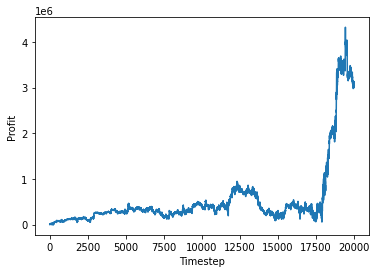

In [0]:
plt.plot(profit_graph)
plt.xlabel("Timestep")
plt.ylabel("Profit")
plt.show()

Random Forest

In [0]:
# clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)

In [0]:
clf = RandomForestClassifier(min_samples_leaf=50)

In [116]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
y_pred = clf.predict(X_test)
print(y_pred)
acc = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(acc)

[1 1 1 ... 1 0 0]
0.54205


In [0]:
# predictions = clf.predict(X_test)

In [0]:
current_profit, current_asset, profit_graph = calculate_profit(X_test, y_pred, 1000000)

In [121]:
print(current_profit)
print(current_asset)

4447971.490000012
5447971.490000012


In [122]:
bitcoin = []
i = 0
while i < 20000:
  bitcoin.append(1000000/df_test['Close'].iloc[-1]*df_test['Close'].iloc[i] - 1000000)
  i += 1
print(bitcoin)

[594156.9688768606, 592070.3653585925, 592008.1190798376, 592692.8281461434, 595182.6792963464, 597504.7361299051, 599109.6075778077, 600849.7970230042, 601872.801082544, 601131.2584573748, 599594.0460081189, 599085.2503382948, 598446.549391069, 598995.9404600812, 600446.5493910688, 598178.6197564276, 599832.2056833559, 598687.4154262515, 598687.4154262515, 599623.8159675235, 599623.8159675235, 598560.2165087957, 597834.9120433016, 598614.3437077131, 596665.7645466847, 601577.8078484437, 602005.4127198916, 601082.5439783491, 601144.790257104, 600654.9391069012, 600798.3761840323, 600912.043301759, 601320.7036535859, 601894.4519621108, 602533.1529093368, 603004.0595399188, 602782.1380243571, 602216.5087956695, 602216.5087956695, 601810.5548037887, 602838.9715832204, 603112.3139377537, 603599.4587280108, 603372.1244925575, 605821.3802435724, 604438.4303112312, 602611.6373477671, 601350.4736129905, 599807.848443843, 601737.4830852502, 603255.7510148848, 604316.6441136671, 603120.433017591

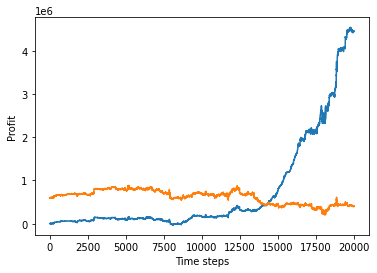

In [123]:
plt.plot(profit_graph)
plt.plot(bitcoin)
plt.xlabel("Time steps")
plt.ylabel("Profit")
plt.show()

In [0]:
print(profit_graph)

SVM

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

In [0]:
n_estimators = 10

clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(X_train, y_train)

In [0]:
y_pred = clf.predict(X_test)
print(y_pred)
acc = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(acc)

In [0]:
current_profit, current_asset, profit_graph = calculate_profit(X_test, y_pred, 1000000)
print(current_profit)
print(current_asset)

In [0]:
plt.plot(profit_graph)
plt.xlabel("Timestep")
plt.ylabel("Profit")
plt.show()

Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = clf.predict(X_test)
print(y_pred)
acc = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(acc)

[0 0 0 ... 0 0 0]
0.46795


In [0]:
current_profit, current_asset, profit_graph = calculate_profit(X_test, y_pred, 1000000)
print(current_profit)
print(current_asset)

161020.2700000021
1161020.270000002


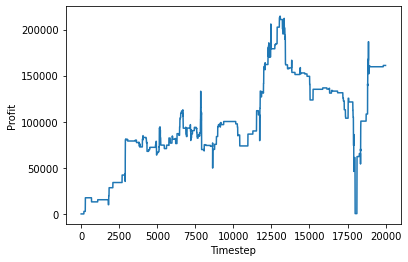

In [0]:
plt.plot(profit_graph)
plt.xlabel("Timestep")
plt.ylabel("Profit")
plt.show()